<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_271/2003803173.py:54: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{ij}$')


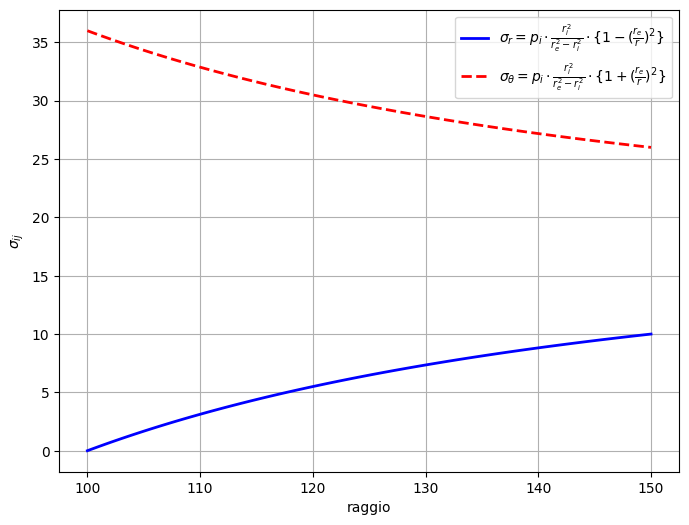

In [10]:
#   le ipotesi per questo foglio di calcolo sono:
#
#   * materiale omogeneo
#
#       * se i materiali hanno differenti moduli elastici non si possono 
#         portare avanti le semplificazioni nella trattazione analitica
#         che arrivano a riciclare le informazioni scalari per entrambe 
#         le parametrizzazioni delle sigma.
#
#   * legame costitutivo lineare elastico
#
#       * idem come sopra
# -----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# Funzione per pressione interna --> condizione di carico =! da dominio fisico
def pressione_interna (r, r_i, r_e, p_i):

    sigma_radiale = p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 - (r_e / r)**2)
    sigma_anulare = p_i * (r_i**2 / (r_e**2 - r_i**2)) * (1 + (r_e / r)**2)

    return sigma_radiale , sigma_anulare

# Funzione per pressione esterna --> condizione di carico =! da dominio fisico

def pressione_esterna (r, r_i, r_e, p_e):

    sigma_radiale = -p_e * (r_e**2 / (r_e**2 - r_i**2)) * (1 - (r_i / r)**2)
    sigma_anulare = -p_e * (r_e**2 / (r_e**2 - r_i**2)) * (1 + (r_i / r)**2)

    return sigma_radiale , sigma_anulare

def grafico_tensioni (r,load_case,bc_pressione):

    # Define the range for the free variable 'r'
    r = np.linspace(r_i, r_e, 100)  # r varies between r_i and r_e

    # Compute the expressions for all values of 'r'
    y1, y2 = load_case(r, r_i, r_e, bc_pressione)

    # Create the plot
    plt.figure(figsize=(8, 6))

    # Plot the first expression
    plt.plot(r, y1, label=r'$\sigma_{r} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1- ( \frac{r_e}{r})^{2} \}$', color='b', linestyle='-', linewidth=2)

    # Plot the second expression
    plt.plot(r, y2, label=r'$\sigma_{\theta} = p_i \cdot \frac{r_i^{2}}{r_e^{2}-r_i^{2}} \cdot \{ 1+ ( \frac{r_e}{r})^{2} \}$', color='r', linestyle='--', linewidth=2)

    # Label the axes
    plt.xlabel('raggio')
    plt.ylabel('$\sigma_{ij}$')

    # Add grid and legend
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()
    return

#-----------------------------------------------------------------------------


# Input values for r_i, r_e, p_i, p_e
r_i = float(input("Enter the value of r_i: "))
r_e = float(input("Enter the value of r_e: "))
p_i = float(input("Enter the value of p_i: "))
p_e = float(input("Enter the value of p_e: "))

# Define the range for the free variable 'r'
r = np.linspace(r_i, r_e, 100)  # r varies between r_i and r_e

match (p_i,p_e):

    case (0,_):
        load_case = pressione_esterna
        bc_pressione = p_e

    case(_,0):
        load_case = pressione_interna
        bc_pressione = p_i
    
    case _:
        print("no case matched")

grafico_tensioni(r,load_case,bc_pressione)

